## 라이브러리 로드

In [1]:
# 필요 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로드
* [KLUE Benchmark](https://klue-benchmark.com/)

In [2]:
# read_json 으로 url 데이터 불러오기
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"
df = pd.read_json(url)
df.shape

(45678, 7)

In [3]:
df.head()

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,IT과학,사회,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,생활문화,"{'annotators': ['03', '02', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05


In [4]:
# 중복데이터가 있는지 확인합니다.
df[df.duplicated(subset=['title'])]

,guid,title,predefined_news_category,label,annotations,url,date


In [5]:
# 결측치를 확인합니다.
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

## 워드클라우드 시각화

In [6]:
# 텍스트 하나로 만들기
news_title = " ".join(df["title"])
news_title[:500]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 야외서 생방송 하세요…액션캠 전용 요금제 잇따라 월드컵 태극전사 16강 전초기지 레오강 입성종합 미세먼지 속 출근길 왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보 베트남 경제 고성장 지속…2분기 GDP 6.71% 성장 그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원 정진석 이정현 당현실 냉정하게 봐야…물러나는게 좋다종합 美 베네수엘라 구호품 반입 촉구 안보리 결의 추진 황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루 정상회담 D1 文대통령 취임 후 남북관계 주요 일지 LGU＋ 1분기 영업익 1천706억원…마케팅 비용 감소종합 박원순 시장 아부다비 루브르 박물관 방문 방심위 강릉서 고성 산불현장처럼 보도한 KBS'

In [7]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

# !apt -qq -y install fonts-nanum

import platform

# 운영체제에 따른 한글 폰트 경로 설정
if platform.system() == 'Windows':
    # Windows 운영체제의 경우
    font_path = r'C:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    # macOS의 경우
    font_path = r'/Library/Fonts/AppleGothic.ttf'
else:
    # Linux 또는 기타 운영체제의 경우 (예: 'NanumBarunGothic')
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


stopwords = ['하지만', '그리고', '그런데', '저는','제가',
             '그럼', '이런', '저런', '합니다',
             '많은', '많이', '정말', '너무', '수', '등', '것']

def display_word_cloud(data, width=1200, height=500):

    word_draw = WordCloud(
        font_path=font_path,
        width=width, height=height,
        stopwords=stopwords,
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

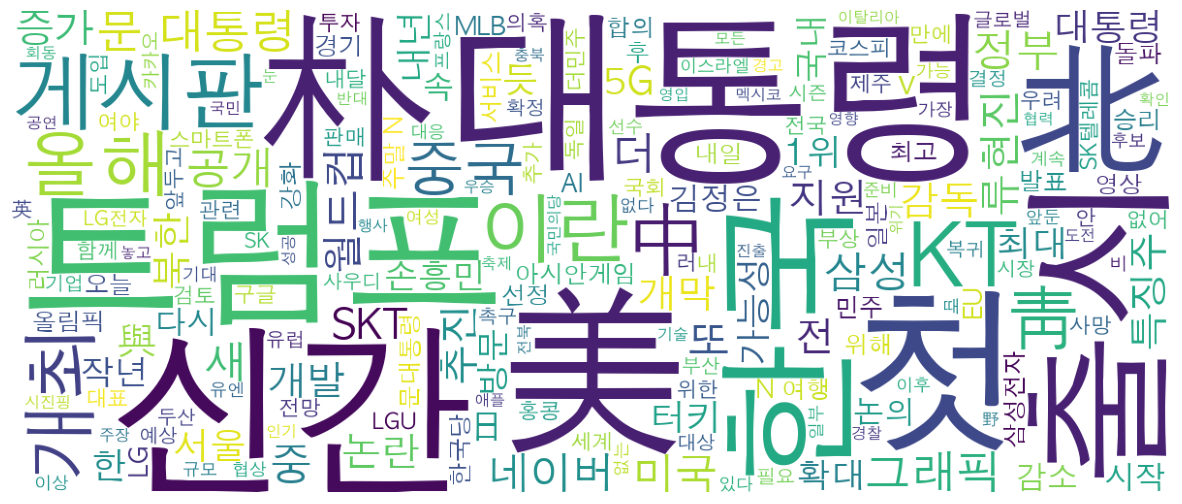

In [9]:
display_word_cloud(news_title)

## 정규표현식으로 전처리

In [10]:
# 숫자 제거하기
# df["title"].str.replace("[0-9]", " ", regex=True)
df["title2"] = df["title"].str.replace(r"\d", " ", regex=True)

df["title3"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " ", regex=True)

## 정규표현식 전처리 후 워드클라우드 시각화

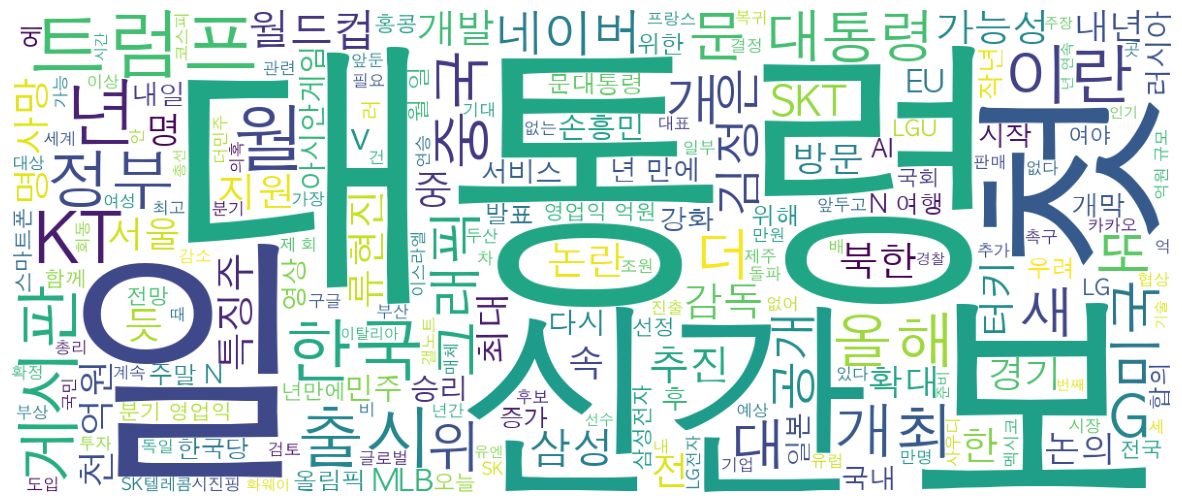

In [11]:
display_word_cloud(" ".join(df["title3"]))

## 형태소 분석기로 특정 품사만 추출하기

* [hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [12]:
# !pip install pecab

In [13]:
df["label"].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [14]:
from pecab import PeCab

pecab = PeCab()

# 명사 추출 함수 정의
def extract_nouns(text):
    nouns = pecab.nouns(text)
    return ' '.join(nouns)  # 명사 리스트를 띄어쓰기로 구분된 하나의 문자열로 결합

df = df[df["label"] == "사회"].head(100)
# 'title' 열에 함수 적용하여 명사 추출 및 문자열 결합
df['title_nouns'] = df['title'].apply(extract_nouns)

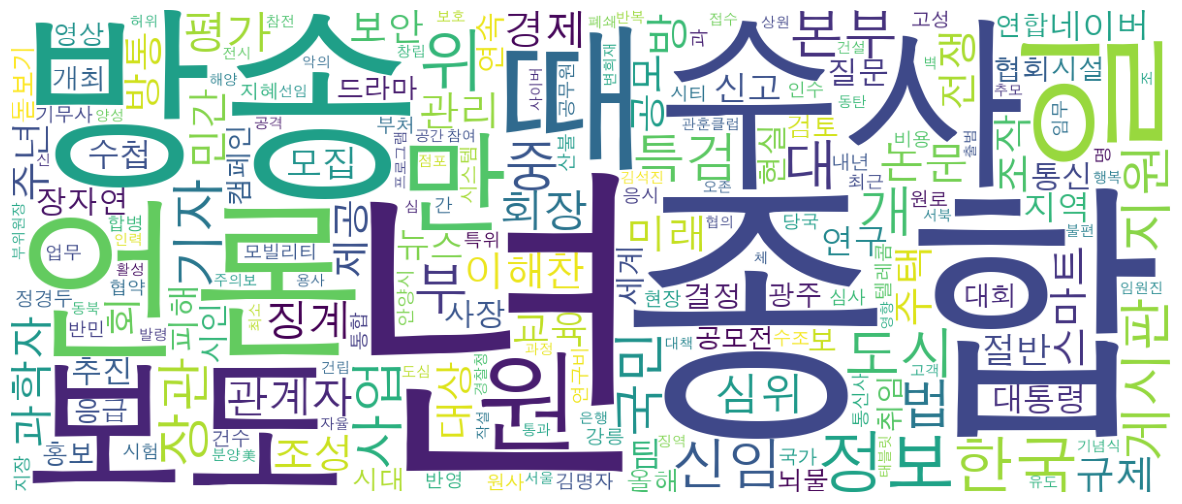

In [15]:
display_word_cloud(" ".join(df['title_nouns']))

## 워드클라우드 마스크처리

* https://github.com/amueller/word_cloud/blob/main/examples/masked.py

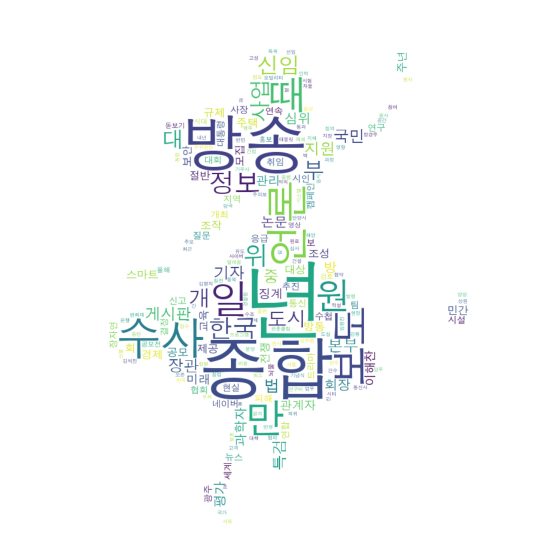

In [16]:
import requests
from PIL import Image

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 데이터를 받아옵니다
response = requests.get(mask_img_path)

# HTTP 요청이 성공했는지 확인합니다
if response.status_code == 200:
    # 응답으로 받은 데이터를 파일로 저장합니다
    with open("alice_mask.png", "wb") as file:
        file.write(response.content)

mask_img = np.array(Image.open("alice_mask.png"))

def display_word_cloud(data, width=1200, height=500, mask=mask_img):

    word_draw = WordCloud(
        font_path=font_path,
        width=width, height=height,
        stopwords=stopwords,
        mask=mask_img,
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

display_word_cloud(" ".join(df['title_nouns']))